<h1> Analyse descriptive des données web scrapping Trust Pilot</h1>

In [1]:
import pandas as pd
import numpy as np

In [82]:
df = pd.read_csv("/Users/lheyerda/Library/CloudStorage/OneDrive-Personal/Supply Chain/data/avis/general_df.csv")
df.shape

(170751, 11)

In [76]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170751 entries, 0 to 170750
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0.1     170751 non-null  int64  
 1   Unnamed: 0       170751 non-null  object 
 2   user             170157 non-null  object 
 3   etoiles          170163 non-null  object 
 4   n_avis           169488 non-null  float64
 5   localisation     169487 non-null  object 
 6   date_avis        169488 non-null  object 
 7   titre_avis       169488 non-null  object 
 8   text_avis        169488 non-null  object 
 9   date_experience  168813 non-null  object 
 10  page             168813 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 14.3+ MB


,Unnamed: 0.1,Unnamed: 0,user,etoiles,n_avis,localisation,date_avis,titre_avis,text_avis,date_experience,page
0,0,0,Mme Rakotondrasamy Lalanirina,1,3.0,FR,2023-10-20T03:16:24.000Z,Orgueil gestionnaire,"Ça reste une mauvaise expérience, quand ton ge...",Date de l'expérience: 19 octobre 2023,MaBanqueBNPParibas
1,1,1,Florian T,1,2.0,FR,2023-10-19T13:10:44.000Z,Mauvaise expérience en agence physique et en l...,"Mauvaise expérience en agence classique, mon c...",Date de l'expérience: 19 octobre 2023,MaBanqueBNPParibas
2,2,2,Anca Visdei,5,1.0,FR,2023-10-19T15:41:51.000Z,"Chère agence ,","Chère agence ,je dois bous dire que tant mon m...",Date de l'expérience: 19 octobre 2023,MaBanqueBNPParibas
3,3,3,Pat perso,1,5.0,FR,2023-10-18T16:13:38.000Z,Mépris ou incompétence ou les 2,"RV pris à l'agence du Touquet, sur proposition...",Date de l'expérience: 17 octobre 2023,MaBanqueBNPParibas
4,4,4,Sylvia FABRE,2,4.0,FR,2023-10-17T22:22:10.000Z,Pas d'imprimé prévu pour transferts de compte ...,Pour une demande de transfert de fonds d'un co...,Date de l'expérience: 17 octobre 2023,MaBanqueBNPParibas


In [83]:
# date_experience

df['date_experience']= df.date_experience.str.replace("Date de l'expérience: ","")
df['date_experience'] =df.date_experience.str.replace(" ","-")
month_translation = {
    'janvier': 'January',
    'février': 'February',
    'mars': 'March',
    'avril': 'April',
    'mai': 'May',
    'juin': 'June',
    'juillet': 'July',
    'août': 'August',
    'septembre': 'September',
    'octobre': 'October',
    'novembre': 'November',
    'décembre': 'December'
}
for i, date in enumerate(month_translation):
    df['date_experience'] = df.date_experience.str.replace(list(month_translation.keys())[i],list(month_translation.values())[i])
df['date_experience'] = pd.to_datetime(df.date_experience, format='%d-%B-%Y')


In [79]:
df.date_experience_red

0        2023-10-19
1        2023-10-19
2        2023-10-19
3        2023-10-17
4        2023-10-17
            ...    
170746   2023-10-04
170747   2023-09-28
170748   2023-10-09
170749   2023-10-06
170750   2023-09-26
Name: date_experience_red, Length: 170751, dtype: datetime64[ns]

In [84]:
# date_experience, date_avis > datetime
from datetime import datetime
df['date_avis'] = pd.to_datetime(df['date_avis'])
df['date_avis'] = df['date_avis'].apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))
df['date_avis'] = pd.to_datetime(df['date_avis'])


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170751 entries, 0 to 170750
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Unnamed: 0.1     170751 non-null  int64         
 1   Unnamed: 0       170751 non-null  object        
 2   user             170157 non-null  object        
 3   etoiles          170751 non-null  object        
 4   n_avis           169488 non-null  float64       
 5   localisation     169487 non-null  object        
 6   date_avis        169488 non-null  datetime64[ns]
 7   titre_avis       170751 non-null  object        
 8   text_avis        170751 non-null  object        
 9   date_experience  168813 non-null  datetime64[ns]
 10  page             168813 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(7)
memory usage: 14.3+ MB


In [102]:
# text_avis, titre_avis > str
df['text_avis'] = df['text_avis'].astype("str")
df['titre_avis'] = df['titre_avis'].astype("str")

# étoiles > int
#df['etoiles'] = df['etoiles'].astype("int64")
liste_etoiles = ["1","2","3","4","5"]
df = df[df['etoiles'].isin(liste_etoiles)]
#

<h1> Analyse descriptive </h1>

In [95]:
import seaborn as sns


In [105]:
df.etoiles.value_counts()

5    120513
1     23048
4     18763
3      4154
2      3010
Name: etoiles, dtype: int64

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169488 entries, 0 to 170750
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Unnamed: 0.1     169488 non-null  int64         
 1   Unnamed: 0       169488 non-null  object        
 2   user             169482 non-null  object        
 3   etoiles          169488 non-null  object        
 4   n_avis           169488 non-null  float64       
 5   localisation     169487 non-null  object        
 6   date_avis        169488 non-null  datetime64[ns]
 7   titre_avis       169488 non-null  object        
 8   text_avis        169488 non-null  object        
 9   date_experience  168813 non-null  datetime64[ns]
 10  page             168813 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(7)
memory usage: 19.5+ MB


df.info()

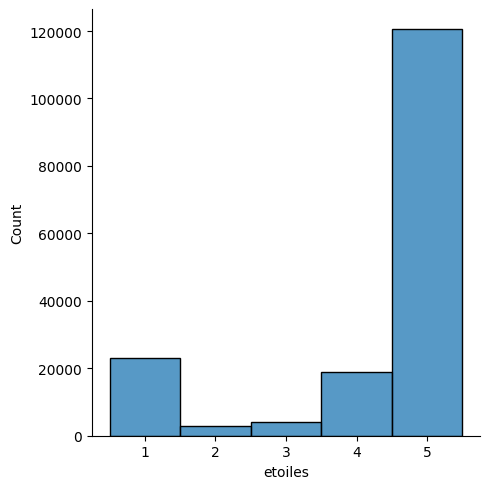

In [112]:
df = df.sort_values('etoiles')
sns.displot(df["etoiles"]);

KeyboardInterrupt: 

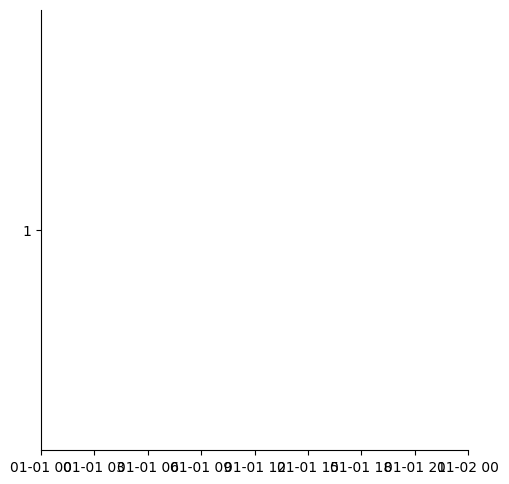